In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import re
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
playstore_df = pd.read_csv("googleplaystore.csv")

In [4]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [6]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
# merging both data set on "app"
df = pd.merge(reviews_df, playstore_df, on='App', how='inner')


In [8]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Translated_Review       72605 non-null   object 
 2   Sentiment               72615 non-null   object 
 3   Sentiment_Polarity      72615 non-null   float64
 4   Sentiment_Subjectivity  72615 non-null   float64
 5   Category                122662 non-null  object 
 6   Rating                  122622 non-null  float64
 7   Reviews                 122662 non-null  object 
 8   Size                    122662 non-null  object 
 9   Installs                122662 non-null  object 
 10  Type                    122662 non-null  object 
 11  Price                   122662 non-null  object 
 12  Content Rating          122662 non-null  object 
 13  Genres                  122662 non-null  object 
 14  Last Updated        

In [10]:
df.shape

(122662, 17)

In [11]:
df.isnull().sum()

App                           0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
dtype: int64

#### lot of null values , needs to handle and data cleaning

In [12]:
df = df.dropna(subset=['Sentiment', 'Translated_Review'])


In [13]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Reviews'] = df['Reviews'].fillna(0)
df['Price'] = df['Price'].fillna(0)

In [14]:
df['Size'] = df['Size'].fillna('0')  # or clean + convert later
df['Installs'] = df['Installs'].fillna('0')
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])


In [15]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
dtype: int64

In [16]:
def clean_size(size):
    if pd.isnull(size) or size == 'Varies with device':
        return np.nan
    size = size.strip().upper()
    if size.endswith('M'):
        return float(size.replace('M', ''))
    elif size.endswith('K'):
        return float(size.replace('K', '')) / 1024 
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)

In [17]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


## Univariate Analysis
  

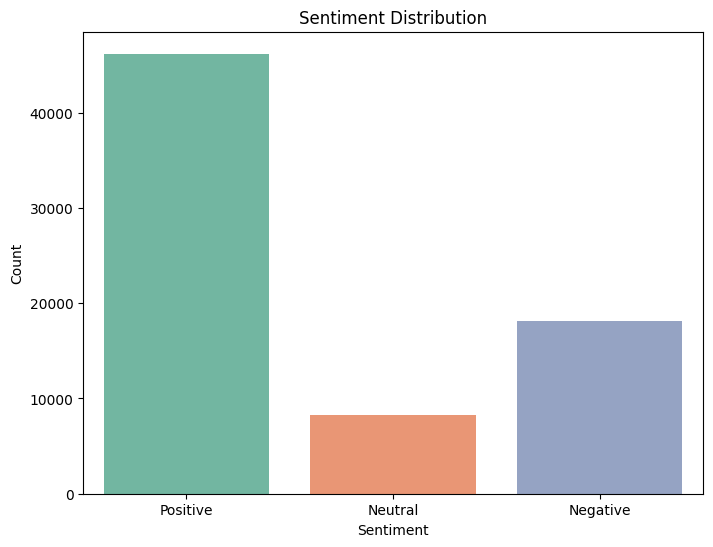

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#balanced data

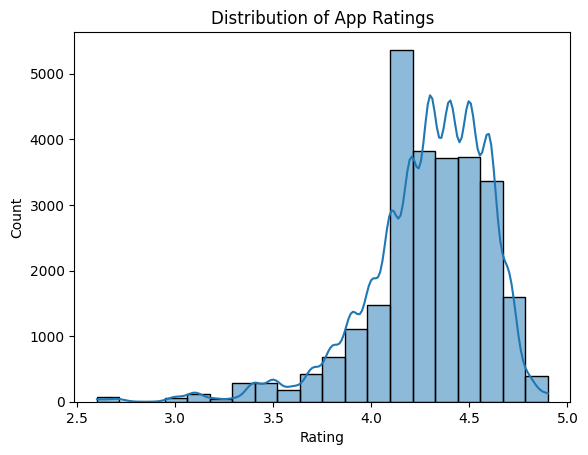

In [ ]:
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()


#To observe how ratings are spread 
# Insights:
  # If skewed right, most users rate apps highly.




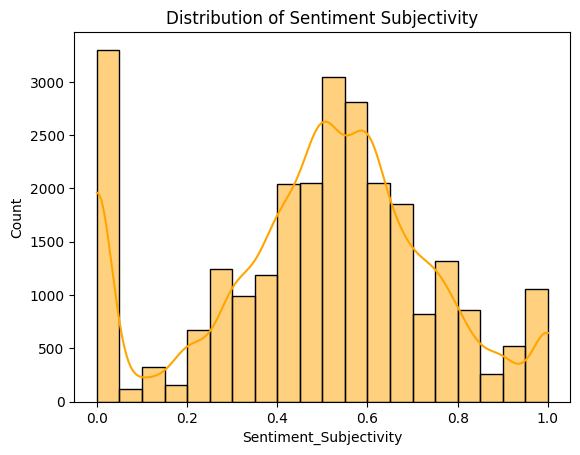

In [ ]:
sns.histplot(df['Sentiment_Subjectivity'], bins=20, kde=True, color='orange')
plt.title("Distribution of Sentiment Subjectivity")
plt.show()


# To see how subjective or objective the reviews are.
#  Insights:
##     Most reviews might be moderately subjective, meaning users express opinion more than facts.



## Bivariate Analysis

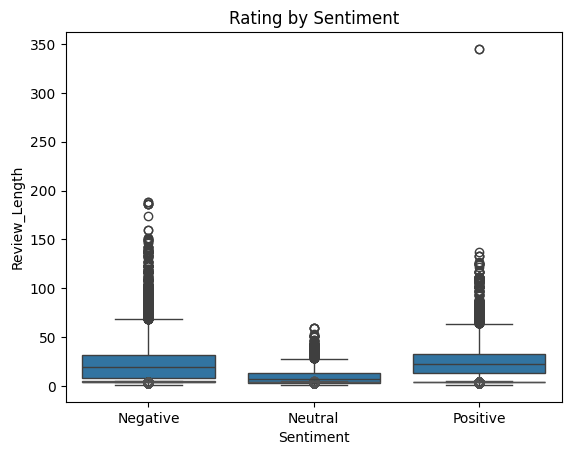

In [ ]:
# Rating vs Sentiment
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title("Rating by Sentiment")
plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])
plt.show()

 # Negative reviews may be longer, containing detailed complaints.

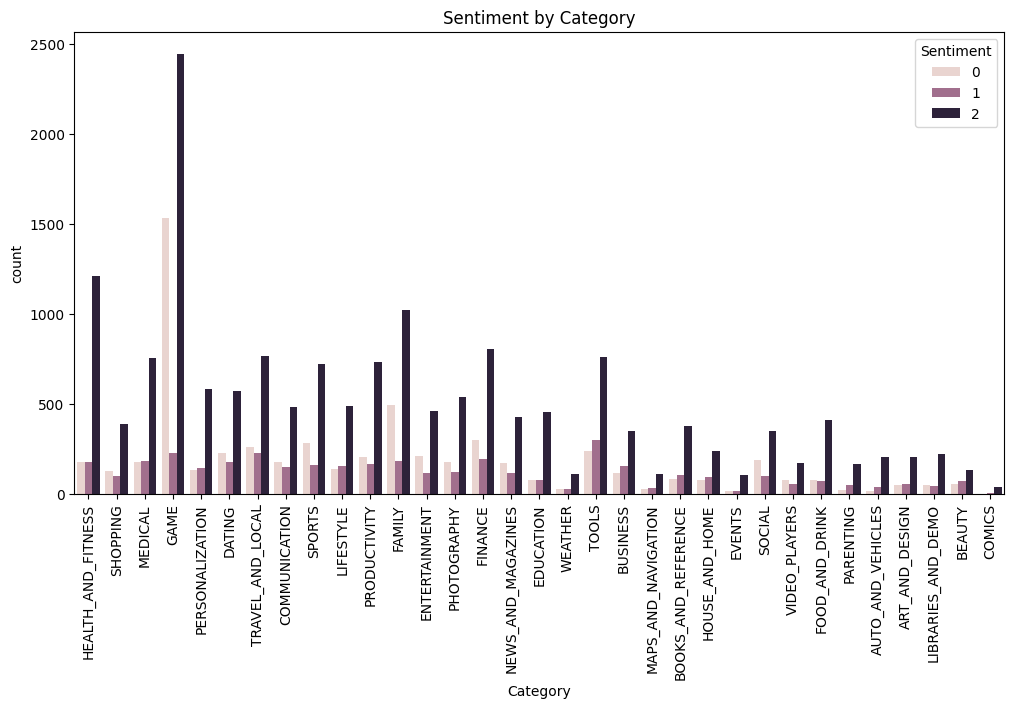

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', hue='Sentiment')
plt.xticks(rotation=90)
plt.title("Sentiment by Category")
plt.show()

#To analyze how sentiment varies by app category.
#Insights:
##    some categories like Games may have higher negative reviews.
##    Others like Health & Fitness might have mostly positive sentiment.


## Multivariate Analysis

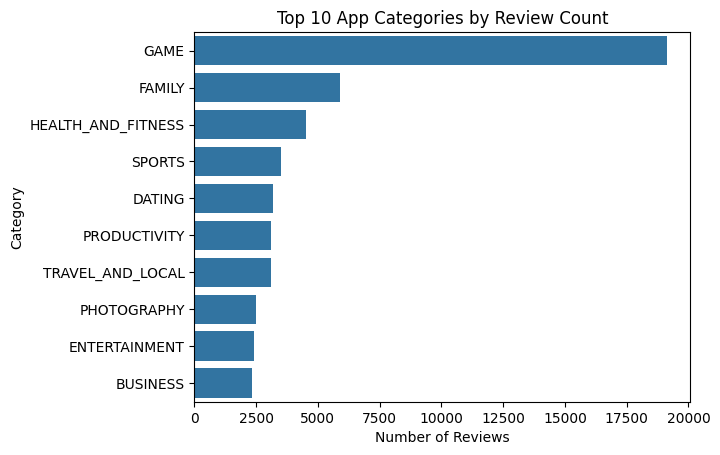

In [21]:
#review count by category
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 App Categories by Review Count")
plt.xlabel("Number of Reviews")
plt.show()

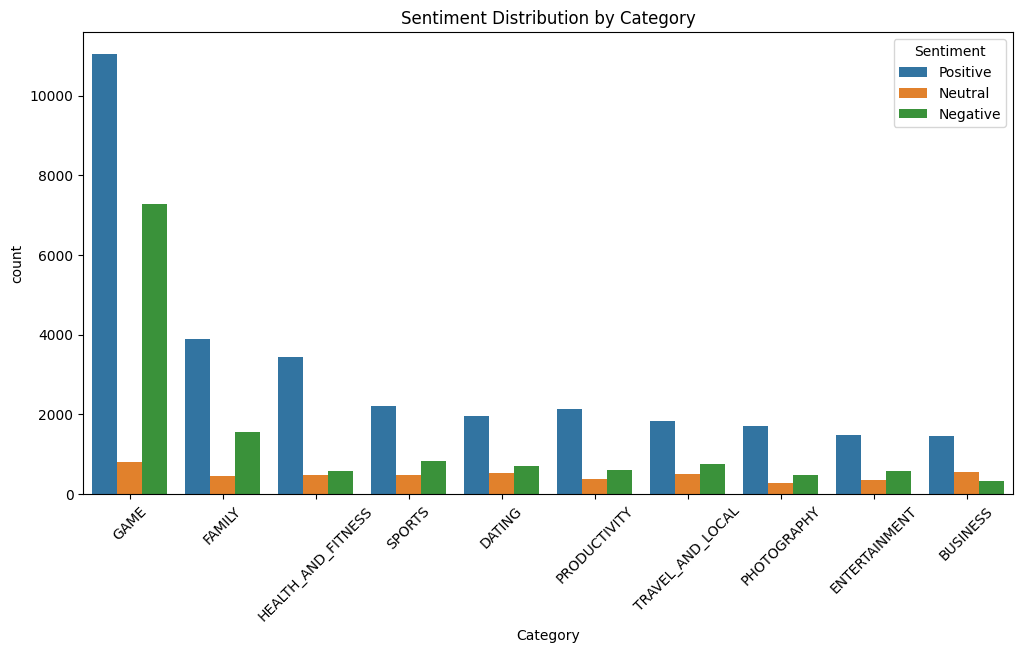

In [ ]:
# Sentiment Distribution per Category

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='Sentiment', order=df['Category'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Sentiment Distribution by Category")
plt.show()



# To Compare Sentiment Trends Across App Categories
  #  * It shows which categories get more positive, negative, or neutral feedback.
  #  * Helps identify if certain categories (like Games) are more polarizing.



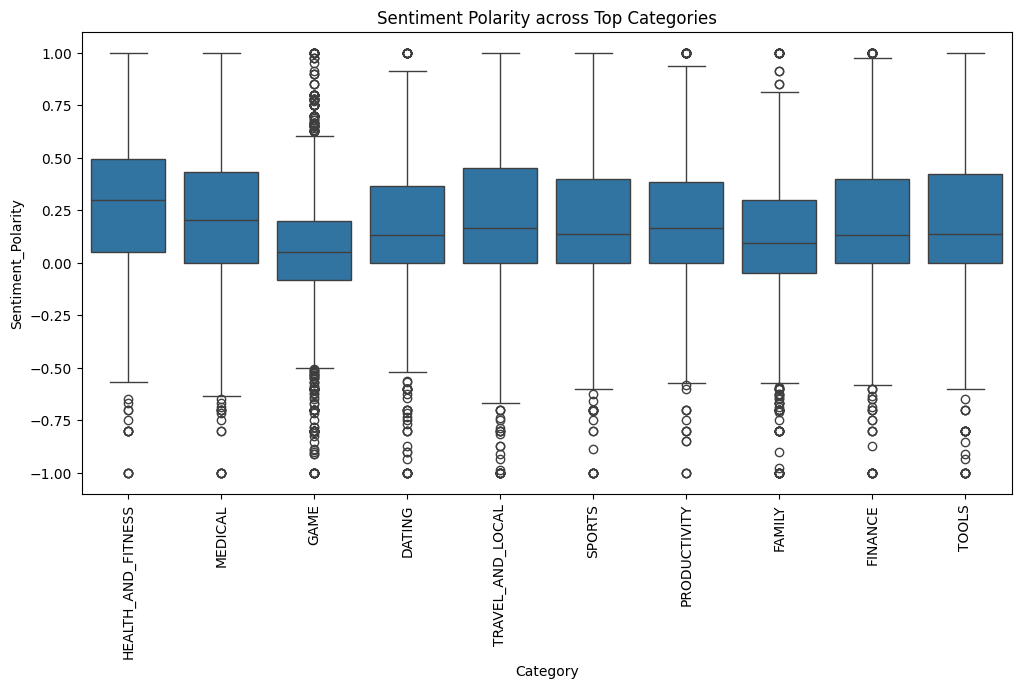

In [ ]:
plt.figure(figsize=(12,6))
top_categories = df['Category'].value_counts().head(10).index
sns.boxplot(x='Category', y='Sentiment_Polarity', data=df[df['Category'].isin(top_categories)])
plt.xticks(rotation=90)
plt.title("Sentiment Polarity across Top Categories")
plt.show()

#o analyze how sentiment scores vary across top app categories.
# Insights: 
#   Categories with low median polarity may indicate lower user satisfaction.
#   Helps identify high-risk or highly praised categories.


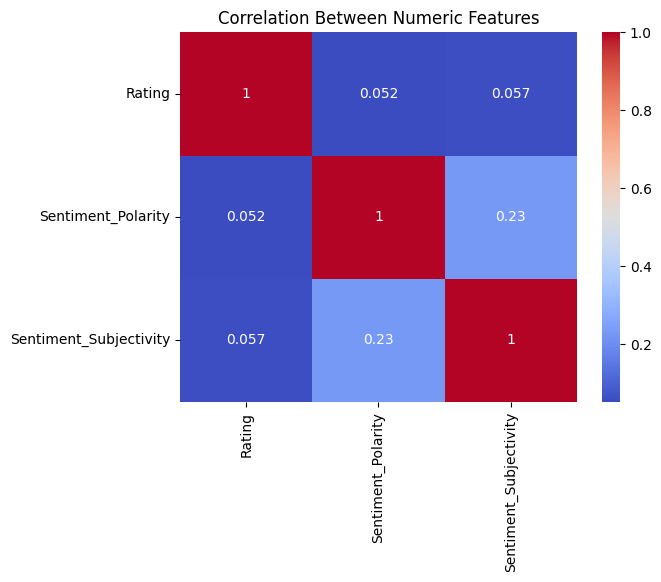

In [ ]:
#correlation heatmap
sns.heatmap(df[['Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()


 # To Detect Relationships Between Variables
 
 # insights-- 1. User Ratings and Sentiment Polarity Are Only Weakly Related (Coreltion-0.05 =very weak)
  #it means even if a user writes a positive review, they might not always give a high star rating
  
  #2. Overall, No Strong Multicollinearity
    #all correlations are low (< 0.3), which means features are not strongly correlated.



In [46]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [47]:
numerical_features

['Sentiment',
 'Sentiment_Polarity',
 'Sentiment_Subjectivity',
 'Rating',
 'Size',
 'Review_Length',
 'Category_encoded']

In [48]:
categorical_features

['App',
 'Translated_Review',
 'Category',
 'Reviews',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']